<a href="https://colab.research.google.com/github/johyunkang/adp_certificate/blob/main/ADP_practical_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ADP 실기 23회

URL : https://www.datamanim.com/dataset/ADPpb/00/p1.html

## 기계학습 (50점)

### 1번

온,습도,조도,CO2농도에 따른 객실의 사용유무 판별


종속변수 Occupancy, 0: 비어있음 , 1: 사용중


데이터 출처 : https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+


data Url : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/p1/problem1.csv

In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/p1/problem1.csv')
df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.40,0.004773,1
1,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.75,0.004744,1
2,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.00,0.004767,1
3,2015-02-02 14:23:59,23.7600,26.260,568.666667,790.00,0.004779,1
4,2015-02-02 14:25:59,23.7540,26.290,509.000000,797.00,0.004783,1


#### 1-1번

 데이터 EDA 수행 후, 분석가 입장에서 의미있는 탐색

In [2]:
import pandas as pd

print(df.info())
print('''
결측치가 일부 존재하며 데이터 타입은 date 컬럼을 제외하고 모두 float형식이다
''')

# print(df.isnull().sum())
display(df.isnull().sum()) 
# Q. 위 print 와 display 의 차이는 뭐지?
# DF를 출력해보면 print는 단순 글자처럼 나오고, display 는 표처럼 나옴
print()
print(df[df.CO2.isnull()].date.values)
print('\n결측치는 CO2 컬럼에만 존재한다. 결측치의 데이터는 연속적으로 존재하는 것이 아니다.')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17910 entries, 0 to 17909
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           17910 non-null  object 
 1   Temperature    17910 non-null  float64
 2   Humidity       17910 non-null  float64
 3   Light          17910 non-null  float64
 4   CO2            17889 non-null  float64
 5   HumidityRatio  17910 non-null  float64
 6   Occupancy      17910 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 979.6+ KB
None

결측치가 일부 존재하며 데이터 타입은 date 컬럼을 제외하고 모두 float형식이다



date              0
Temperature       0
Humidity          0
Light             0
CO2              21
HumidityRatio     0
Occupancy         0
dtype: int64


['2015-02-03 19:09:59' '2015-02-03 19:31:00' '2015-02-04 18:08:00'
 '2015-02-05 06:08:00' '2015-02-05 16:09:59' '2015-02-08 08:06:00'
 '2015-02-08 11:54:00' '2015-02-08 20:58:59' '2015-02-09 06:04:59'
 '2015-02-09 07:31:00' '2015-02-09 07:49:00' '2015-02-10 07:53:59'
 '2015-02-12 00:34:00' '2015-02-12 10:53:00' '2015-02-12 15:04:00'
 '2015-02-12 20:38:00' '2015-02-13 22:53:59' '2015-02-15 16:41:59'
 '2015-02-16 00:53:59' '2015-02-17 01:56:00' '2015-02-18 06:20:00']

결측치는 CO2 컬럼에만 존재한다. 결측치의 데이터는 연속적으로 존재하는 것이 아니다.


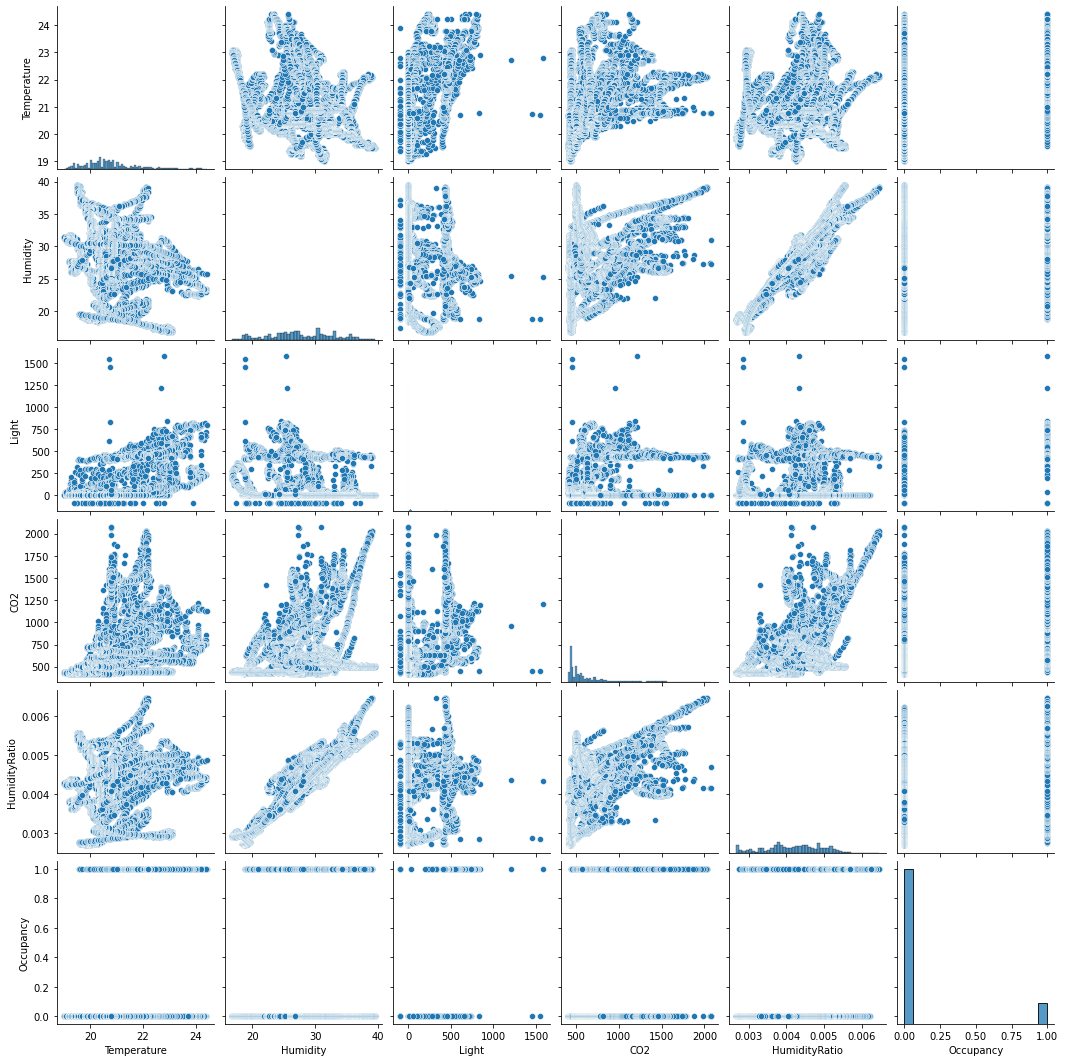

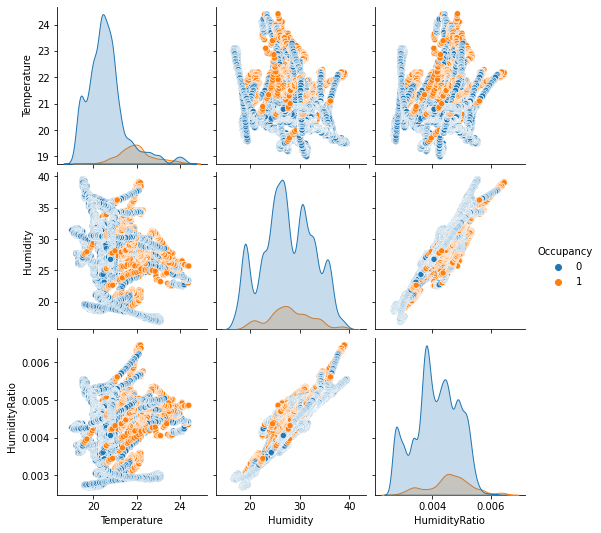

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)
plt.show()

# hue 옵션을 이용해 특정 컬럼명을 입력하면 종류에 따른 색상 구분을 할 수 있음
# vars 옵션을 이용해 특정 컬럼만 나타나게 할 수 있음
sns.pairplot(df, hue='Occupancy', vars=['Temperature', 'Humidity', 'HumidityRatio']) 
plt.show()

,Temperature,Humidity,Light,CO2,HumidityRatio
0,23.7180,26.290,578.400000,760.40,0.004773
1,23.7225,26.125,493.750000,774.75,0.004744
2,23.7540,26.200,488.600000,779.00,0.004767
3,23.7600,26.260,568.666667,790.00,0.004779
4,23.7540,26.290,509.000000,797.00,0.004783


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17910 entries, 0 to 17909
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    17910 non-null  float64
 1   Humidity       17910 non-null  float64
 2   Light          17910 non-null  float64
 3   CO2            17889 non-null  float64
 4   HumidityRatio  17910 non-null  float64
dtypes: float64(5)
memory usage: 699.7 KB


None

type: <class 'str'>  , value: Temperature


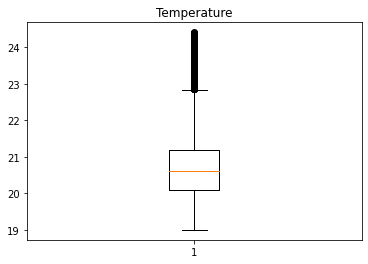

type: <class 'str'>  , value: Humidity


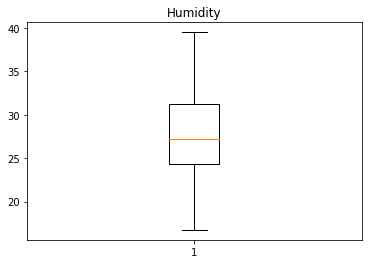

type: <class 'str'>  , value: Light


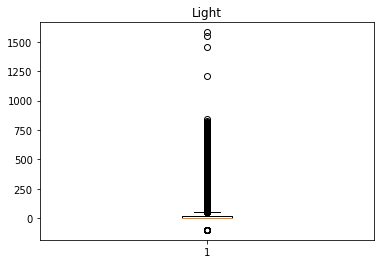

type: <class 'str'>  , value: CO2


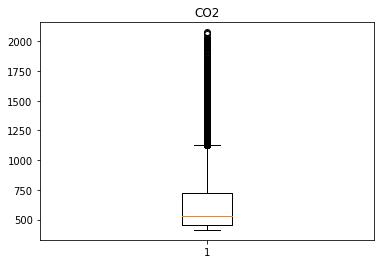

type: <class 'str'>  , value: HumidityRatio


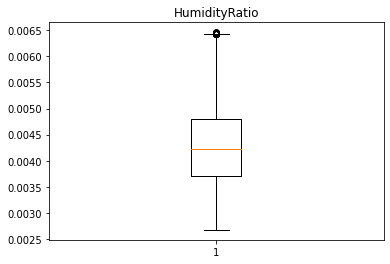


Humidity, humidityRatio 컬럼은 높은 상관관계를 보이며, 
두 컬럼을 제외한 나머지 데이터의 경우 이상치가 상대적으로 많이 존재한다.



In [4]:
df_flot = df.select_dtypes(include='float')
display(df_flot.head())
display(df_flot.info())

# df.select_dtypes(include='float') : DF의 type 이 float 인 컬럼들을 DF 로 반환, for 문으로 반환한 경우 index 명이 str 형식으로 반환
for v in df.select_dtypes(include='float'): 
    print('type:', type(v), ' , value:', v)
    target = df[v].dropna()
    plt.boxplot(target)
    plt.title(v)
    plt.show()


print('''
Humidity, humidityRatio 컬럼은 높은 상관관계를 보이며, 
두 컬럼을 제외한 나머지 데이터의 경우 이상치가 상대적으로 많이 존재한다.
''')



In [5]:
display(df[df.Light < 0].shape)
display(df[df.Light == -99].shape)
display(df.describe())
print('''
Light 컬럼의 경우 -99 인 값이 50개 존재한다.
''')

(50, 7)

(50, 7)

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,17910.000000,17910.000000,17910.000000,17889.000000,17910.000000,17910.000000
mean,20.749036,27.589163,78.157369,647.700865,0.004175,0.117253
std,0.994012,5.043595,168.574068,285.997340,0.000755,0.321730
min,19.000000,16.745000,-99.000000,412.750000,0.002674,0.000000
25%,20.100000,24.390000,0.000000,453.000000,0.003702,0.000000
50%,20.600000,27.200000,0.000000,532.666667,0.004222,0.000000
75%,21.200000,31.290000,22.000000,722.000000,0.004790,0.000000
max,24.408333,39.500000,1581.000000,2076.500000,0.006461,1.000000



Light 컬럼의 경우 -99 인 값이 50개 존재한다.



In [6]:
# pd.to_datetime(df['date']) : 기존 object 형식의 date 컬럼을 datetime 형식으로 변경
df['date'] = pd.to_datetime(df['date'])
timedeltas = df['date'].diff().dt.seconds.dropna()
print(timedeltas.describe())
print()
print('''
75%의 데이터가 연속하는 데이터 사이에 61초 이내의 시간 차이를 가지고 있다.
연속된 데이터간의 최대 시간 차이는 25680초로 대략 7시간 차이가 존재한다.
시계열 데이터로 데이터를 해석할 경우 이 사이 시간들은 결측치로 볼 수 있다.
''')

print(25680 / 3600)

count    17909.000000
mean        71.357474
std        241.363584
min         59.000000
25%         60.000000
50%         60.000000
75%         61.000000
max      25680.000000
Name: date, dtype: float64


75%의 데이터가 연속하는 데이터 사이에 61초 이내의 시간 차이를 가지고 있다.
연속된 데이터간의 최대 시간 차이는 25680초로 대략 7시간 차이가 존재한다.
시계열 데이터로 데이터를 해석할 경우 이 사이 시간들은 결측치로 볼 수 있다.

7.133333333333334


#### 1-2번

In [7]:
data = [[-1],[-0.5],[pd.NA],[1],[2],[3],[3],[5],[5]]
row = ['A','B','C','D','E','F','G','H','I']
df = pd.DataFrame(data=data, index=row, columns=['value'])
print(df)
df['rank'] = df['value'].rank()
df['max_rank'] = df['value'].rank(method='max')
df['min_rank'] = df['value'].rank(method='min')
df['min_rank_bottom'] = df['value'].rank(method='min', na_option='bottom')
df['min_rank_top'] = df['value'].rank(method='min', na_option='top')
df['min_rank_pct'] = df['value'].rank(method='min', na_option='top', pct=True)
display(df)

  value
A    -1
B  -0.5
C  <NA>
D     1
E     2
F     3
G     3
H     5
I     5


,value,rank,max_rank,min_rank,min_rank_bottom,min_rank_top,min_rank_pct
A,-1,1.0,1.0,1.0,1.0,2.0,0.222222
B,-0.5,2.0,2.0,2.0,2.0,3.0,0.333333
C,<NA>,NaN,NaN,NaN,9.0,1.0,0.111111
D,1,3.0,3.0,3.0,3.0,4.0,0.444444
E,2,4.0,4.0,4.0,4.0,5.0,0.555556
F,3,5.5,6.0,5.0,5.0,6.0,0.666667
G,3,5.5,6.0,5.0,5.0,6.0,0.666667
H,5,7.5,8.0,7.0,7.0,8.0,0.888889
I,5,7.5,8.0,7.0,7.0,8.0,0.888889


결측치를 대체하는 방식 선택하고 근거제시, 대체 수행

In [8]:
print('''
CO2 컬럼에 nan 값으로 비어있는 데이터는 직전, 직후 데이터를 비교해서 Occupancy 값이 변화되지 않거나,
date 값이 3분 이내로 연속하는 데이터라고 한다면 직전 CO2값으로 대체한다.
위의 두 기준에 해당한다면 모든 CO2의 결측치를 대체 할 수 있고 
데이터의 품질을 손상 시키지 않는다고 판단 할 수 있다.
''')

for value in df[df['CO2'].isnull()].index :
    target = df.iloc[value-1 : value+2]
    difftime = target['date'].diff().dt.seconds.dropna()
    if target.Occupancy.nunique() == 1 and len(difftime[difftime > 180]) == 0 :
        df.loc[value, 'CO2'] = df.loc[value-1].CO2
        
display(df.isnull().sum())


CO2 컬럼에 nan 값으로 비어있는 데이터는 직전, 직후 데이터를 비교해서 Occupancy 값이 변화되지 않거나,
date 값이 3분 이내로 연속하는 데이터라고 한다면 직전 CO2값으로 대체한다.
위의 두 기준에 해당한다면 모든 CO2의 결측치를 대체 할 수 있고 
데이터의 품질을 손상 시키지 않는다고 판단 할 수 있다.



KeyError: ignored

#### 1-3번

추가적으로 데이터의 질 및 품질관리를 향상시킬만한 내용 작성

In [ ]:
print('''
Light 컬럼의 -99는 예외값에 대해 임의 값을 입력한 것으로 보인다.
-99를 제외한 컬럼의 최솟값인 0으로 대체한다.
평균적으로 시간은 1분 간격의 데이터이다.
하지만 최대 7시간의 공백이 존재한다.
이를 보간해주는 방법 일 수 있지만, 시계열 모델을 사용하지 않을 것이기에
보간을 따로 해주지 않고 모델링을 진행한다.
''')

#### 2-1번 
데이터에 불균형이 있는지 확인, 불균형 판단 근거 작성

In [ ]:
plt.figure(figsize=(15, 4))
plt.scatter(df['date'], df['Occupancy'].astype('str'), s=0.03) # option 값 s 는 점의 사이즈
plt.show()
print('value_counts:\n', df.Occupancy.value_counts())


print('''
Occupancy 의 경우 7:1 비율로 데이터 불균형이 존재한다.
위의 그래프에서 보면 2월 7일 ~ 9일, 2월 14 ~ 16일까지는 객실이 비어있다. 
이처럼 객실이 비어있지 않는 경우 보다, 비어있는 경우가 더 많기에 불균형이 존재한다.
''')

#### 2-2번
오버샘플링 방법들 중 2개 선택하고 장단점 등 선정 이유 제시

In [ ]:
print('''
*랜덤오버샘플링*
소수 클래스 데이터 중 랜덤샘플링하여 다수 클래스 데이터 숫자와 맞추는 방식
장점 : 데이터 불균형 문제 해결
단점 : 종속변수에 대한 고려없이 중복 생성, overfitting의 가능성이 존재

*SMOTE*
소수 클래스 데이터와 그 데이터에서 가장 가까운 K개의 소수 클래스 데이터 중 무작위로 선택된
데이터 사이의 직선상에 가상의 소수 클래스 데이터를 만드는 방법
장점 : 데이터 불균형 문제 해결, 데이터 분포를 고려한 중복없는 데이터 생성
단점 : 고차원 데이터에는 문제가 발생할 수 있다.
''')

#### 2-3번
오버샘플링 수행 및 결과, 잘 되었다는 것을 판단해라

In [ ]:
from sklearn.model_selection import train_test_split
import warnings
# warnings.filterwarnings('ignore')

# train, test 데이터를 분리하고 train 데이터에 대해서만 오버 샘플링을 진행한다.
x = df.drop(columns=['Occupancy'])
y = df['Occupancy']

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=43, test_size=0.35)

print('1')
display(x_train.head())

from imblearn.over_sampling import RandomOverSampler, SMOTE

# datetime 형태로는 샘플링 할 수 없기에 timestamps 형식으로 바꿔서 샘플링을 진행한다.
x_train.loc[:, 'datetime'] = x_train['date'].view('int') # 10**9
x_test.loc[:, 'datetime'] = x_test['date'].view('int')  # 10**9

print('2')
display(x_train.head())

from sklearn.preprocessing import StandardScaler

x_imb = x_train.drop(columns=['date']).reset_index(drop=True).copy()
y_imb = y_train.reset_index(drop=True).copy()

x_samp, y_samp = RandomOverSampler(random_state=2022).fit_resample(x_imb, y_imb)
total = pd.concat([x_samp, y_samp], axis=1)
# display(total)
# total['date'] = pd.to_datetime(total['datetime'], unit='s')    # datetime 컬럼을 timestamp 형식으로 변환하는데 초 단위로 변환
total['date'] = pd.to_datetime(total['datetime'])

SMOTE_x_samp, SMOTE_y_samp = SMOTE(random_state=2022).fit_resample(x_imb, y_imb)
SMOTE_total = pd.concat([SMOTE_x_samp, SMOTE_y_samp], axis=1) # axis=1 > 옆으로 붙이기, default=0 (아래로 붙이기)
# SMOTE_total['date'] = pd.to_datetime(SMOTE_total['datetime'], unit='s')
SMOTE_total['date'] = pd.to_datetime(SMOTE_total['datetime'])
                                     
plt.figure(figsize=(15, 4))
plt.title('RandomSampling')
plt.scatter(total['date'], total['Occupancy'].astype('str'), s=0.03)
plt.show()

plt.figure(figsize=(15, 4))
plt.title('SMOTE')
plt.scatter(SMOTE_total['date'], SMOTE_total['Occupancy'].astype('str'), s=0.03)
plt.show()
# 그래프 이해가 잘 안됨

print('''
RandomSampling 대비 SMOTE에서 좀 더 다양한 차원의 샘플이 생성됨을 볼 수 있다.
(2월 18일 부근)
''')




#### 3-1번
속도측면, 정확도측면 모델 1개씩 선택, 선택 이유도 기술

In [ ]:
print('''
이진 분류 문제이다.
속도측면에서는 linear regression,
정확도 측면에서는 randomforest classifier를 선택하여 분석을 진행하겠다.
''')

#### 3-2번
위에서 오버샘플링 한 데이터 2개, 오버샘플링 하기 전 데이터 1개에 대해 모델 2개를 적용하고 성능 보여주기

In [ ]:
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler

# 불필요 컬럼제거 및 스케일링
if 'date' in x_train.columns :
    x_train = x_train.drop(columns=['date'])

if 'date' in x_test.columns :
    x_test = x_test.drop(columns=['date'])

result_auc_train = []
result_auc_test = []
result_time = []

for train_x, train_y in [(x_train, y_train), (x_samp, y_samp), (SMOTE_x_samp, SMOTE_y_samp)] :

    trainX = train_x.copy()
    testX = x_test.copy()
    sc = MinMaxScaler()
    trainX = sc.fit_transform(trainX)
    testX = sc.transform(testX)

    lrstart = time.time()
    lr = LogisticRegression()
    lr.fit(trainX, train_y)
    lrend = time.time() - lrstart

    pred_lr = lr.predict(testX)
    auc_lr_train = roc_auc_score(train_y, lr.predict(trainX))
    auc_lr = roc_auc_score(y_test, pred_lr)

    rfstart = time.time()
    rf = RandomForestClassifier()
    rf.fit(trainX, train_y)
    rfend = time.time() - rfstart

    pred_rf = rf.predict(testX)
    auc_rf_train = roc_auc_score(train_y, rf.predict(trainX))
    auc_rf = roc_auc_score(y_test, pred_rf)

    result_auc_test.append([auc_lr, auc_rf])
    result_time.append([lrend, rfend])
    result_auc_train.append([auc_lr_train, auc_rf_train])


# logistic regression 과 randomforest 분류기를 샘플 방식에 따른 학습시 
# 정확도와 모델 학습 시간에 대해서 평가했다.

print('훈련셋 모델 auc 결과')
result_auc_trains = pd.DataFrame(result_auc_train)
result_auc_trains.index = ['raw', 'randomSampling', 'SMOTE']
result_auc_trains.columns = ['logistic', 'randomforest']
display(result_auc_trains)

print('\n\n테스트셋 모델 auc 결과')
result_auc_tests = pd.DataFrame(result_auc_test)
result_auc_tests.index = ['raw', 'randomSampling', 'SMOTE']
result_auc_tests.columns = ['logistic', 'randomforest']
display(result_auc_tests)

print('\n\n모델 학습시간 (sec)')
result_times = pd.DataFrame(result_time)
result_times.index = ['raw', 'randomSampling', 'SMOTE']
result_times.columns = ['logistic', 'randomforest']
display(result_times)

#### 3-3번
위 예측결과 사용해서 오버샘플링이 미친 영향력에 대해 작성하라

In [ ]:
print('''
logistic regression의 경우 학습시간은 random forest에 비해 낮게 나왔지만
모델 성능의 경우 train 셋의 경우 모두 낮게 나왔으며
test 셋의 경우 업샘플링을 하지 않은 경우를 제외하고는 모두 성능이 낮게  나왔다.
randomforest 의 경우 학습 모델의 경우 auc 값이 1로 오버피팅 되었다.
test 셋에 대해서는 raw, randomSampling, SMOTE 순으로 auc 값이 증가하는것을 확인할 수 있다.
''')

## 통계분석 (50점)

#### 2번
공장에서는 진공관 수명이 1만 시간이라고 주장하여 품질관리팀에서 12개 샘플을 뽑았음
유의수준 5%에서 부호 검정하시오

data URL : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/p1/problem2.csv

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/p1/problem2.csv')
display(df.head())
df.describe()

#### 2-1번 
귀무가설, 연구가설 세우기

In [ ]:
print('''
귀무가설 : 데이터의 중위수는 1만 시간이다.
연구가설 : 데이터의 중위수는 1만 시간이 아니다.
''')

#### 2-2번
유효한 데이터의 개수는?

In [ ]:
print('중위수와 동일한 값들은 순위 부호 검정에서 불필요한 데이터이다.그 숫자는 :', df[df['life span'] == 10000].shape[0])
df_fillter = df[df['life span'] != 10000]
display(df_fillter)

#### 2-3번
 검정통계량 및 연구가설 채택 여부를 작성하라

In [ ]:
from scipy.stats import wilcoxon
static, pvalue = wilcoxon(df_fillter['life span'] - 10000)
result = wilcoxon(df_fillter['life span'] - 10000)
print('검정통계량은 ', static, '이다. pvalue는 ', pvalue, '로 5% 유의 수준에서 귀무가설을 기각할 수 없다.')
result_str = f'static은 {result[0]} 이고 pvalue는 {result[1]} 로 5% 유의 수준에서 귀무가설을 기각할 수 없다.'
print(result_str)
print('연구가설을 채택하지 않는다.')

### 3번
코로나 시계열 데이터

국가명 / 일자 / 확진자수

데이터 출처 (후처리과정 미포함)
URL : https://www.kaggle.com/antgoldbloom/covid19panels?select=country_panel.csv


데이터 URL : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/p1/problem3_covid2.csv

In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/p1/problem3_covid2.csv')
display(df)
df.describe()

#### 3-1번
데이터는 일자별 각 나라의 일일 확진자수를 나타낸다. 각 나라의 일자별 누적확진자 수를 나타내는 데이터 프레임을 생성하라.

In [ ]:
# df_grp = df.groupby(['location', 'date']).sum().groupby(by=['location']).cumsum()
target = df.groupby(['location', 'date']).sum().groupby(level=0).cumsum() # leveld은 by 와 동일한데 0, 1로 컬럼 순서로 지정
print('groupby 로 인한 index reset 이전')
display(target)

print('\n\ngroupby 로 인한 index reset 이후')
target.columns = ['cumulative sum']
target = target.reset_index()
display(target)

#### 3-2번
1에서 구한 데이터를 각 나라별로 acf 값을 구하고 (lag는 50개까지 구하고 첫번째 값을 제외하라) 국가를 기준으로 유클리디안 거리를 기준으로 클러스터링을 진행 후 계층적 군집분석을 위해 덴드로그램 작성하라

In [ ]:
from scipy.spatial import distance
import statsmodels.api as sm
import numpy as np

name = []
for lo in target.location.unique() :
    v = sm.tsa.stattools.acf(target[target.location == lo]['cumulative sum'], nlags=50, fft=False)
    name.append([lo]+list(v[1:]))

v = pd.DataFrame(name)

import seaborn as sns
import scipy
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

data = v.set_index(0)
label = np.array(data.index)

datav = data.values

fig = plt.figure(figsize=(17, 10))

ax3 = fig.add_subplot(1, 1, 1)
dend3 = sch.linkage(datav, method='average', metric='euclidean')
cutoff = 0.3*max(dend3[:, 2])
dend_res3 = sch.dendrogram(dend3, color_threshold=cutoff)
ax3.set_xticklabels(label[dend_res3['leaves']], minor=False)

plt.show()

### 4번
아래 이미지와 같은 학과별 학점 분포 인원수 표가 있다. 학과와 성적이 관계있는지를 검정하라.

![sample-img](https://user-images.githubusercontent.com/291782/195266695-15b817ff-f872-4f1a-b4c1-4cdb31b2e9e0.png)

#### 4-1번
귀무가설, 연구가설 세우기

In [ ]:
print('''
귀무가설 : 학과와 성적이 관계가 없다. (독립이다.)
연구가설 : 학과와 성적이 관계가 있다. (독립이 아니다.)
''')

#### 4-2번
학과와 성적이 독립일 경우의 기댓값을 구하시오

In [ ]:
df = pd.DataFrame({'사회과학':[15, 60, 24], '자연과학':[25, 69, 5], '공학':[10, 77, 13]})
df.index = ['1.5-2.5', '2.5-3.5', '3.5-4.5']
display(df)

from scipy.stats import chi2_contingency, fisher_exact


chi2, p, dof, expected = chi2_contingency(df)
print(expected)

#### 4-3번
검정통계량을 구하고 연구가설의 채택여부 작성

In [ ]:
print('p-value는 {0:.6f}'.format(p))
print('''
* 카이제곱 검정 시 p-value 는 0.00018로 귀무가설을 기각한다.
학과와 성적은 관련이 있다.
만약 5보다 작은 셀이 20%가 넘어가므로(75%) 피셔의 정확성 검정을 사용해야 한다.
''')

# print(fisher_exact(df))  # 피셔의 정확성 검정 찾아봐라
# df.shape